In [2]:
import numpy as np

### Embedding

The input of a decoder or encoder has an integer index assigned to each of the items in the list, (in this case each word of a sentence).
- Embedding allows for the conversion of categorical data into vectors with continuous (floating point) numbers.
- With training, related items would have similar vectors.
- In "Attention is All You Need", "positional encodings" are added to the input embeddings at the bottoms of the encoder and decoder stacks. The positional encodings have the same dimension "d" as the embeddings, so that the two can be summed.  Due to its sinusoidal nature, any linear offset will allow it to be represented as a function of the original trigonometic equation: sin(a + b) = sin(a)cos(b) cos(a)sin(b).

### Attention

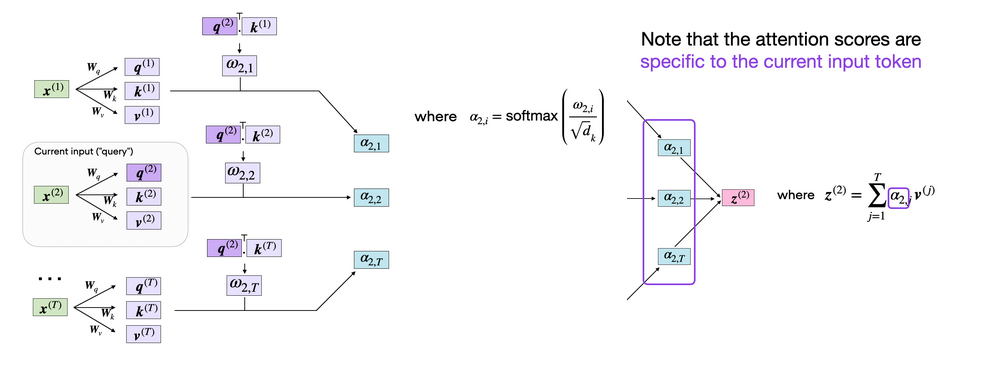

The weight matricies are parameters that are adjusted during training.  The rows of the matrix are the same length as the embedding size of the input vectors so that the size of the Query (Q), Key (K), and Value (V) matrices have the same number of tokens as the input after multiplication.  In other words, the input encodings for each token are now projected into components of the Q, K, V matricies.  It is important to keep the each token's Q and K matrix inputs as vectors in order for their relationship with each other to be calculated using the dot product.

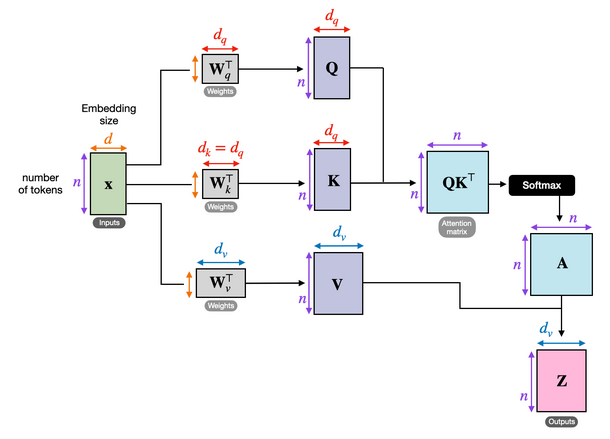

In the example below, the rows go from 0 to "m" and the columns from 0 to "n".
Each element of the softmax matrix takes the dot product between q and k to find how colinear the weighted query with length dq is for a particular token, with a weighted key with length dk is for its own token.
At query token j (row j), with key token i (column i), the element s(j, i) would then contain the matrix multiplication: [j:dq]x[dk:i] = [j, i], with dk = dq.
The greater the linear independence vector q(j) has from vector k(i), the closer the pair is to 0.

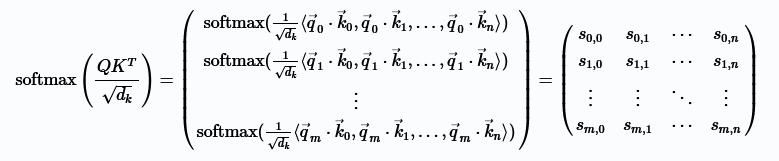

The sum of each row from the softmax funciton gives a normalized probability distribution which adds to one.  Rescaling by sqrt(dk) allows for the variance to be minimized to prevent a single word from dominating the softmax function by pushing the function into regions will small gradients.

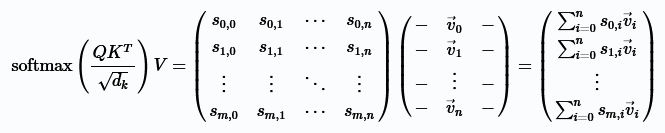
Do this sum for columns 1 to dv.  The matrix goes to m rows, which is the opposite of the figure above, which has a Z matrix that goes to n rows.

The columns of the softmax matrix are the same dimention as the rows of value matrix "V", which gives a series of weighted averages of the rows of V. [m:n] x [n:dv] = [m:dv], here m equals the number of tokens.
Think of the "s" elements along the matrix rows as components of a normalized histogram with a probability distribution based on how well the qk vector pairs for each token are linearly dependent.  

The attention multiplied by the value matrix can be thought of finding the expectation value of v for each token given the softmax distribution calculated.  The effect of this is to determine which token vector with value weights in matrix V should be emphasized in the vectors of matrix Z.  

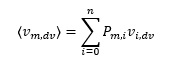
P in this case is the probability distribution.

Probabilities in the attention matrix emphasizing certian positions where q and k are the most linearly dependent, (inputs with the greatest correlation), will magnify certain values in V so that the order of the context vectors of Z will bring attention to specific input vectors of X.

### Feedforward Neural Network

A feedforward neural network is unidirectional and information within the network only travels forward along the nodes.

### Cross Attention

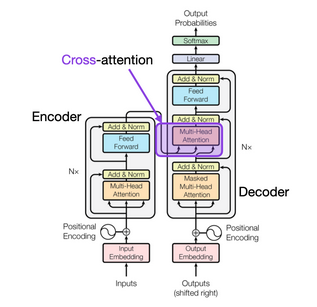

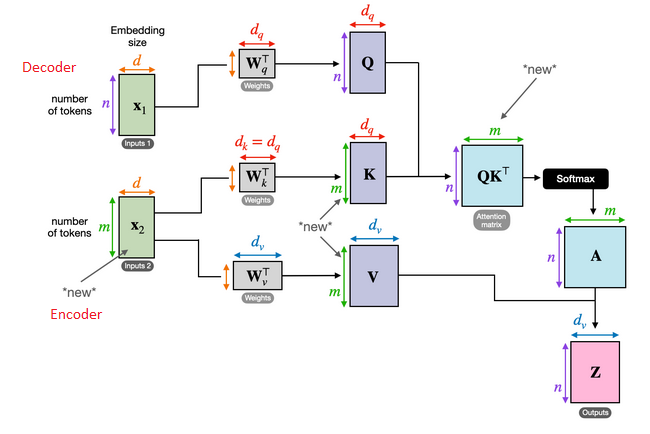  Note that "m" and "n" here are opposite from the figure in the Attention section.